# Working with Cactus horizons

In this notebook, we learn how to work with horizon data. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir

%matplotlib inline

The best way to access horizon data is from `SimDir`:

In [2]:
hor = SimDir("../../tests/horizons").horizons

print(hor)

Horizons found:
3 horizons from QuasiLocalMeasures
2 horizons from AHFinderDirect


As we see, `kuibit` found some horizons. `kuibit` looks for data from `QuasiLocalMeasures` and `AHFinderDirect`. These two thorns use different indexing systems, and, at the moment, you must provide both to uniquely indentify an horizon.

In [3]:
h1 = hor[(0, 1)]
print(h1)

Formation time: 0.0000
Shape available
Final Mass = 5.538e-01
Final Angular Momentum = -3.598e-07
Final Dimensionless Spin = -1.173e-06


You can find the available indices using suitable attributes:

In [4]:
print(hor.available_qlm_horizons)
print(hor.available_apparent_horizons)

[0, 1, 2]
[1, 2]


Once an horizon is fixed, you can access all the properties from `QuasiLocalMeasures` and from `AHFinderDirect` as attributes. These are all `TimeSeries`. For example, the mass as computed by `QuasiLocalMeasures`:

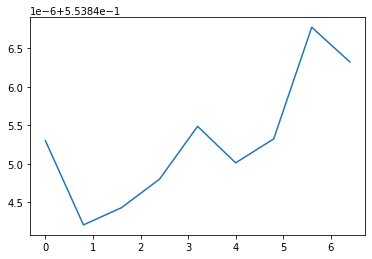

In [5]:
plt.plot(h1.mass)

For quantities from `AHFinderDirect` you have to use the `ah` namespace:

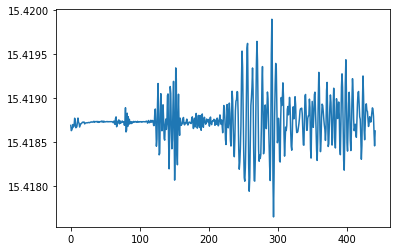

In [6]:
plt.plot(h1.ah.area)

`kuibit` can also work with shape data. `AHFinderDirect` uses multiple patches, we can plot an example in 3D:

Notebook initialized with png backend.



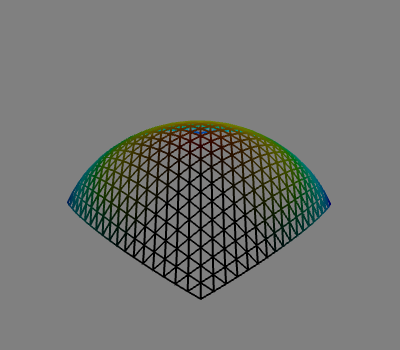

In [7]:
from mayavi import mlab
mlab.init_notebook('png')

(px, py, pz) = h1.shape_at_iteration(0)

mlab.mesh(px[0], py[0], pz[0], representation='wireframe')

If you plot all the patches, you will have the horizon in 3D.


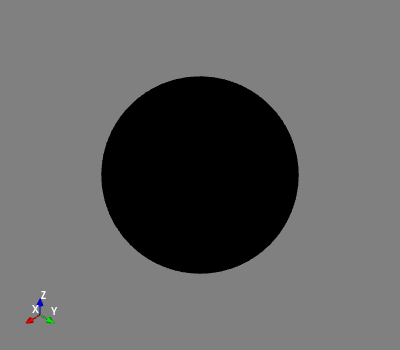

In [8]:
mlab.clf()

for pnum in range(len(px)):
    mlab.mesh(px[pnum], py[pnum], pz[pnum], color=(0, 0, 0))

# For some reasons mlab.show() doesn't produce the picture here, 
# so, there' is an additional mlab.mesh statement. This is here
# just to display the picture
mlab.orientation_axes()
mlab.mesh(px[0], py[0], pz[0], color=(0,0,0))

In case you want to work with a 2D slice, of the shape, you can use the method `shape_outline_at_iteration` and specify how to cut the shape.

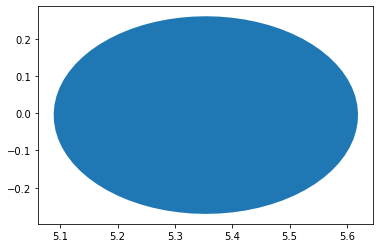

In [9]:
cut = [None, None, 0]  # Equatorial plane (z=0)

plt.fill(*h1.shape_outline_at_iteration(0, cut))